In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utilities import get_tex_label, get_color, latex_text_width_1col

These imports give access to COMPTEL's energy resolution and a function to convolve a spectrum with a detector's smearing function. We will use these to understand how lines contribute to the spectrum for this model.

In [2]:
from hazma.gamma_ray_parameters import energy_res_comptel, energy_res_fermi

# Scalar mediator

This import loads the scalar mediator class from hazma.

In [3]:
from hazma.scalar_mediator import ScalarMediator
from hazma.vector_mediator import VectorMediator

## Spectra's dependence on $m_\chi$
This section examines the dependence of the vector theory's spectra on the dark matter mass since changing the couplings is less interesting.

## Higgs portal couplings

Create a `ScalarMediator` object. The values of couplings to leptons and the strange quark and well as $m_S$ are irrelevant to our focus. The initial value of $m_\chi$ does not matter since it will shortly be changed. The velocity dispersion in the Milky Way $v_\chi \sim 10^{-3}$ is defined here and will be used to set the DM center of mass energy.

In [4]:
sm_args = {"mx": 250., "ms": 1000., "gsxx": 1.,
           "gsff": 1., "gsGG": 1., "gsFF": 1.}
sm = ScalarMediator(**sm_args)

vx_mw = 1.0e-3  # approximate Milky Way velocity dispersion

Choose arrays of photon energies and DM masses. The DM mass array has the same shape as the array of subplots we want to generate.

In [5]:
e_gam_min, e_gam_max, n_e_gams = 5., 300., 250
e_gams = np.logspace(np.log10(e_gam_min), np.log10(e_gam_max), n_e_gams)

n_subplot_rows, n_subplot_cols = 2, 2
mxs = np.array([100., 110., 140., 250.]).reshape((n_subplot_rows, n_subplot_cols))

Iterate over the array of dark matter masses, computing the spectrum at each $E_\gamma \in$ `e_gams`. Most of the code below formats the plot nicely; the `spectra()` function is called in line 12.

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


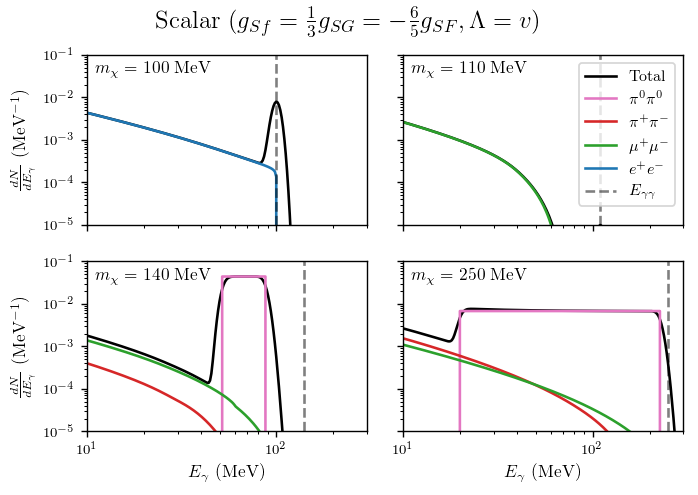

In [6]:
plt.figure(figsize=(latex_text_width_1col, 0.7*latex_text_width_1col))

# Iterate over the values, row and column indices of mxs
it = np.nditer(mxs, flags=['multi_index'])

while not it.finished:
    sm.mx = it[0]  # current value of mx
    idx = it.iterindex  # current index in mxs
    row_idx, col_idx = it.multi_index  # current row and column indices
    plt.subplot(n_subplot_rows, n_subplot_cols, idx + 1)
    
    # Center of mass energy, set to slightly above threshold
    e_cm = 2.*sm.mx * (1. + 0.5 * vx_mw**2)

    # Plot total convolved spectrum
    dnde_det = sm.get_detected_spectrum(e_gam_min, e_gam_max,
                                        e_cm, energy_res=energy_res_comptel)
    plt.loglog(e_gams, dnde_det(e_gams), "black", label="Total")
    
    # Plot individual channels' spectra
    for fs, spec in reversed(sorted(sm.spectra(e_gams, e_cm).iteritems())):
        if fs not in ["total", "s s", "g g"]:
            plt.loglog(e_gams, spec, label=get_tex_label(fs),
                       color=get_color(fs),
                       linewidth=1.5)

    # Mark the lines' energies
    for ch, line in sm.gamma_ray_lines(e_cm).iteritems():
        plt.axvline(line["energy"], linestyle='--', color="k", alpha=0.5,
                    linewidth=1.5, label=r"$E_{\gamma\gamma}$")

    ### Formatting
    # Set axis limits
    plt.xlim(10, 300)
    plt.ylim(1e-5, 1e-1)

    # Only draw the legend for the first subplot
    if idx == 1:
        plt.legend(loc="best")
        
    # Only show ticks and axis labels for subplots on the left and bottom
    if row_idx != n_subplot_rows - 1:
        plt.tick_params(labelbottom="off")
    else:
        plt.xlabel(r"$E_\gamma$ (MeV)")
    if col_idx % n_subplot_cols != 0:
        plt.tick_params(labelleft="off")
    else:
        plt.ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
        
    # Label subplot with dark matter mass
    plt.text(1.1e1, 3.3e-2, r"$m_\chi = %0.f$ MeV" % sm.mx,
             fontsize=10)
    
    it.iternext()

# handles, labels = plt.gca().get_legend_handles_labels()
# lgd = plt.figlegend(handles, labels, loc="lower center",
#                     ncol=6, bbox_to_anchor=(0.5, -0.025))

plt.suptitle(r"Scalar ($g_{Sf} = \frac{1}{3} g_{SG} = -\frac{6}{5} g_{SF}, \Lambda = v$)")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # remove some of the space between plots
plt.savefig("figures/scalar_spectra_higgs_portal.pdf")

## Heavy quark couplings

Create a `ScalarMediator` object. The values of couplings to leptons and the strange quark and well as $m_S$ are irrelevant to our focus. The initial value of $m_\chi$ does not matter since it will shortly be changed. The velocity dispersion in the Milky Way $v_\chi \sim 10^{-3}$ is defined here and will be used to set the DM center of mass energy.

In [21]:
sm_args = {"mx": 250., "ms": 1000., "gsxx": 1.,
           "gsff": 0., "gsGG": 1., "gsFF": 0.}
sm = ScalarMediator(**sm_args)

vx_mw = 1.0e-3  # approximate Milky Way velocity dispersion

Choose arrays of photon energies and DM masses. The DM mass array has the same shape as the array of subplots we want to generate.

In [22]:
e_gam_min, e_gam_max, n_e_gams = 5., 300., 250
e_gams = np.logspace(np.log10(e_gam_min), np.log10(e_gam_max), n_e_gams)

n_subplot_rows, n_subplot_cols = 1, 2
mxs = np.array([140., 250.]).reshape((n_subplot_rows, n_subplot_cols))

Iterate over the array of dark matter masses, computing the spectrum at each $E_\gamma \in$ `e_gams`. Most of the code below formats the plot nicely; the `spectra()` function is called in line 12.

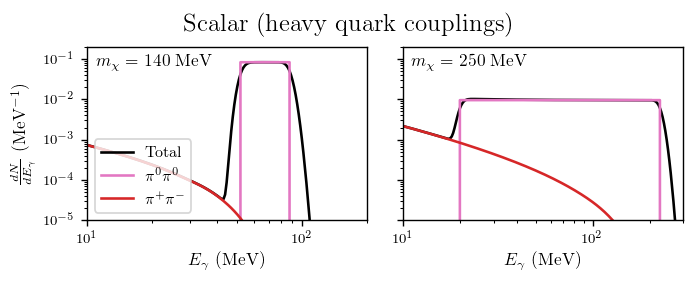

In [23]:
plt.figure(figsize=(latex_text_width_1col, 0.4*latex_text_width_1col))

# Iterate over the values, row and column indices of mxs
it = np.nditer(mxs, flags=['multi_index'])

while not it.finished:
    sm.mx = it[0]  # current value of mx
    idx = it.iterindex  # current index in mxs
    row_idx, col_idx = it.multi_index  # current row and column indices
    plt.subplot(n_subplot_rows, n_subplot_cols, idx + 1)
    
    # Center of mass energy, set to slightly above threshold
    e_cm = 2.*sm.mx * (1. + 0.5 * vx_mw**2)

    # Plot total convolved spectrum
    dnde_det = sm.get_detected_spectrum(e_gam_min, e_gam_max,
                                        e_cm, energy_res=energy_res_comptel)
    plt.loglog(e_gams, dnde_det(e_gams), "black", label="Total")
    
    # Plot individual channels' spectra
    for fs, spec in reversed(sorted(sm.spectra(e_gams, e_cm).iteritems())):
        if fs not in ["total", "s s", "g g", "e e", "mu mu"]:
            plt.loglog(e_gams, spec, label=get_tex_label(fs),
                       color=get_color(fs),
                       linewidth=1.5)

    ### Formatting
    # Set axis limits
    if idx == 0:
        plt.xlim(10, 200)
    else:
        plt.xlim(10, 300)
        
    plt.ylim(1e-5, 2e-1)

    # Only draw the legend for the first subplot
    if idx == 0:
        plt.legend(loc="lower left")
        
    # Only show ticks and axis labels for subplots on the left and bottom
    if row_idx != n_subplot_rows - 1:
        plt.tick_params(labelbottom="off")
    else:
        plt.xlabel(r"$E_\gamma$ (MeV)")
    if col_idx % n_subplot_cols != 0:
        plt.tick_params(labelleft="off")
    else:
        plt.ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
        
    # Label subplot with dark matter mass
    plt.text(1.1e1, 6e-2, r"$m_\chi = %0.f$ MeV" % sm.mx,
             fontsize=10)
    
    it.iternext()

# handles, labels = plt.gca().get_legend_handles_labels()
# lgd = plt.figlegend(handles, labels, loc="lower center",
#                     ncol=6, bbox_to_anchor=(0.5, -0.025))

plt.suptitle(r"Scalar (heavy quark couplings)")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # remove some of the space between plots
plt.savefig("figures/scalar_spectra_heavy_quark.pdf")

## Dependence on couplings

In [8]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [9]:
sm_args = {"mx": 250., "ms": 1000., "gsxx": 1., "gsff": 1., "gsGG": 1., "gsFF": 1.}
sm = ScalarMediator(**sm_args)

vx_mw = 1.0e-3  # approximate Milky Way velocity dispersion

In [10]:
e_gam_min, e_gam_max, n_e_gams = 5., 300., 250
e_gams = np.logspace(np.log10(e_gam_min), np.log10(e_gam_max), n_e_gams)

In [11]:
n_subplot_rows, n_subplot_cols = 2, 2
mxs = np.array([100., 110., 140., 250.]).reshape((n_subplot_rows, n_subplot_cols))

ratios = np.array([-1.5, 1000.])

In [12]:
# Set up the colormap
cmap = cm.viridis_r
norm = Normalize(vmin=ratios[0], vmax=ratios[-1])
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array(ratios)

In [13]:
# Compute the spectra!
spectra_det_sm = {}

for mx in mxs.flatten():
    sm.mx = mx  # current value of mx
    # Center of mass energy, set to slightly above threshold
    e_cm = 2.*sm.mx * (1. + 0.5 * vx_mw**2)
    
    for ratio in ratios:
        sm.gsGG = ratio * sm.gsff
        spec = sm.spectra(e_gams, e_cm)["total"]
        spectra_det_sm[(mx, ratio)] = spec
#         dnde_det = get_detected_spectrum(e_gams, spec,
#                                          *sm.gamma_ray_lines(e_cm),
#                                          energy_res=energy_res_comptel)

#         spectra_det[(mx, ratio)] = dnde_det(e_gams)

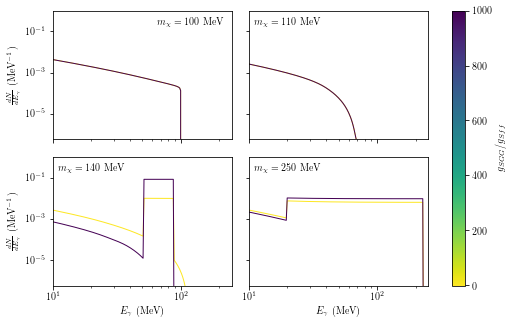

In [14]:
fig, axes = plt.subplots(nrows=n_subplot_rows, ncols=n_subplot_cols, figsize=(7.5, 5), sharex=True, sharey=True)

# Iterate over the values, row and column indices of mxs
it = np.nditer(mxs, flags=['multi_index'])

while not it.finished:
    idx = it.iterindex  # current index in mxs
    row_idx, col_idx = it.multi_index  # current row and column indices
    ax = axes[row_idx, col_idx]
    
    for ratio in ratios:
        ax.loglog(e_gams, spectra_det_sm[(float(it[0]), ratio)], color=m.to_rgba(ratio), linewidth=1)
    
    ### Formatting
    # Set axis limits
    plt.xlim(10, 250)
    plt.ylim(6e-7, 1e0)

    # Only show ticks and axis labels for subplots on the left and bottom
    if row_idx != n_subplot_rows - 1:
        ax.tick_params(labelbottom="off")
    else:
        ax.set_xlabel(r"$E_\gamma$ (MeV)")
    if col_idx % n_subplot_cols != 0:
        ax.tick_params(labelleft="off")
    else:
        ax.set_ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
        
    # Label subplot with dark matter mass
    if (row_idx, col_idx) == (0, 0):
        ax.text(6.5e1, 2e-1, r"$m_\chi = %0.f$ MeV" % it[0])
    else:
        ax.text(1.1e1, 2e-1, r"$m_\chi = %0.f$ MeV" % it[0])
    
    it.iternext()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # remove some of the space between plots
# plt.suptitle(r"Vector mediator")

fig.colorbar(m, ax=axes.ravel().tolist()).set_label(r"$g_{SGG} / g_{Sff}$")

# plt.savefig("figures/scalar_spectra_coupling_dependence.pdf")

## Scratch

In [4]:
from hazma.gamma_ray_parameters import (gc_bg_model, gc_target,
                                        comptel_diffuse, egret_diffuse,
                                        fermi_diffuse)
colors = [c["color"] for c in list(plt.rcParams["axes.prop_cycle"])]

### Binned limit diagram

In [35]:
sm_args = {"mx": 175., "ms": 1000., "gsxx": 1.,
           "gsff": 1., "gsGG": 1., "gsFF": 1.}
sm = ScalarMediator(**sm_args)

vx_mw = 1.0e-3  # approximate Milky Way velocity dispersion
e_cm = 2.*sm.mx * (1. + 0.5 * vx_mw**2)

e_gam_min, e_gam_max, n_e_gams = 5., 300., 250
e_gams = np.logspace(np.log10(e_gam_min), np.log10(e_gam_max), n_e_gams)

In [36]:
observations = [comptel_diffuse, egret_diffuse, fermi_diffuse]
coeffs = []
dnde_dets = []

for obs in observations:
    sv_lim_binned = sm.binned_limit(obs)
    coeffs.append(sv_lim_binned / (4*np.pi*2*2*sm.mx**2) * obs.target.J)#*obs.target.dOmega)
        
    dnde_dets.append(sm.get_detected_spectrum(e_gam_min, e_gam_max,
                                              e_cm, energy_res=obs.energy_res))

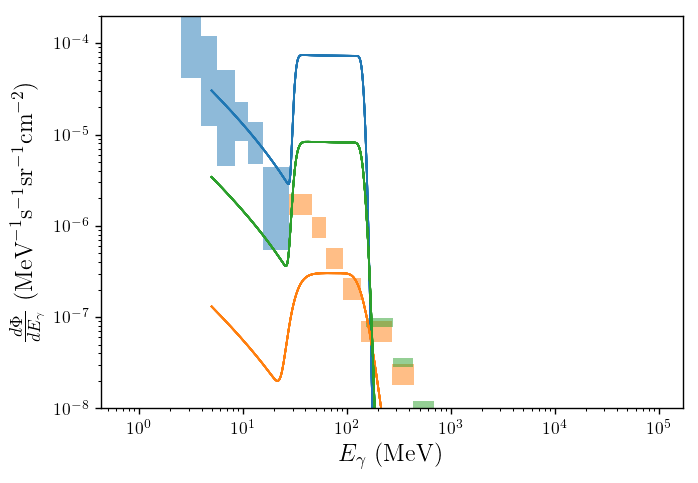

In [85]:
plt.figure(figsize=(latex_text_width_1col, 0.7*latex_text_width_1col))
power = 0

for c, coeff, dnde_det, obs in zip(colors, coeffs, dnde_dets, observations):
    for b, phi, low, high in zip(obs.bins, obs.fluxes,
                                 obs.lower_errors,
                                 obs.upper_errors):
        center = np.mean(b)
        plt.fill_between(b,
                         2*[center**power * (phi - 2*low)],
                         2*[center**power * (phi + 2*high)],
                         color=c, alpha=0.5, linewidth=0)
        
        plt.plot(e_gams,
                 e_gams**power * dnde_det(e_gams)*coeff,
                 color=c, linewidth=1)

# plt.xlim(5e0, 4e2)
plt.tick_params(axis='both', labelsize=10)
plt.ylim(1e-8, 2e-4)
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\frac{d\Phi}{dE_\gamma}$ ($\mathrm{MeV}^{-1}\mathrm{s}^{-1}\mathrm{sr}^{-1}\mathrm{cm}^{-2}$)", fontsize=14)
plt.xlabel(r"$E_\gamma$ (MeV)", fontsize=14)

plt.tight_layout()
# plt.savefig("/Users/acoogan/Dropbox/Physics/Thesis/figures/hazma_figures/binned_lim.pdf")

### Unbinned limit diagram

In [51]:
sm_args = {"mx": 140., "ms": 1000., "gsxx": 1.,
           "gsff": 1., "gsGG": 1., "gsFF": 1.}
sm = ScalarMediator(**sm_args)

vx_mw = 1.0e-3  # approximate Milky Way velocity dispersion
e_cm = 2.*sm.mx * (1. + 0.5 * vx_mw**2)

e_gam_min, e_gam_max, n_e_gams = 5., 300., 250
e_gams = np.logspace(np.log10(e_gam_min), np.log10(e_gam_max), n_e_gams)

In [52]:
sv_lim_unbinned = sm.unbinned_limit(target_params=gc_target,
                           bg_model=gc_bg_model,
                           debug_msgs=True)

coeff = sv_lim_unbinned * gc_target.J / (4*np.pi*2*2*sm.mx**2)  # * gc_target.dOmega

	e_a, e_b =  [ 49.87775545 105.52484793]


/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/theory/_theory_gamma_ray_limits.py:233: RuntimeWarning: invalid value encountered in sqrt
  df_de_a = 1./np.sqrt(I_B_val) * \
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/theory/_theory_gamma_ray_limits.py:235: RuntimeWarning: invalid value encountered in sqrt
  df_de_b = -1./np.sqrt(I_B_val) * \
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/theory/_theory_gamma_ray_limits.py:239: RuntimeWarning: invalid value encountered in sqrt
  return -I_S_val/np.sqrt(I_B_val), jac_val


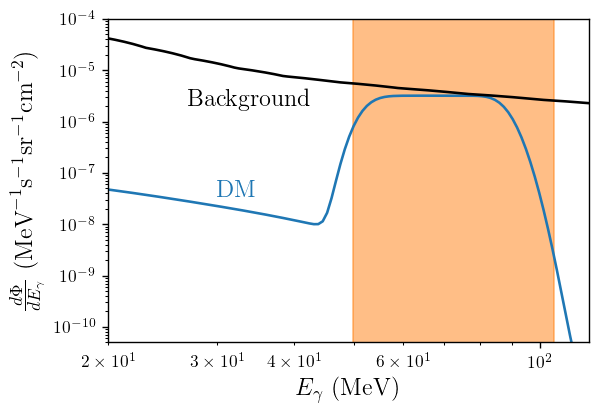

In [59]:
dnde_det = sm.get_detected_spectrum(e_gam_min, e_gam_max,
                                    e_cm, energy_res=energy_res_comptel)
plt.loglog(e_gams, coeff*dnde_det(e_gams))

plt.fill_betweenx([1e-20, 1e5], 49.88, 105.52,
                  alpha=0.5,
                  color=list(plt.rcParams["axes.prop_cycle"])[1]["color"])

plt.loglog(e_gams, gc_bg_model.dPhi_dEdOmega(e_gams), 'k')

plt.text(2.7e1, 2e-6, "Background", fontsize=14)
plt.text(3e1, 3.3e-10, r"DM", color=colors[0], fontsize=14)

plt.xlim(20, 120)
plt.ylim(5e-11, 1e-4)
plt.tick_params(axis='both', which='both', labelsize=10)
plt.ylabel(r"$\frac{d\Phi}{dE_\gamma}$ ($\mathrm{MeV}^{-1}\mathrm{s}^{-1}\mathrm{sr}^{-1}\mathrm{cm}^{-2}$)", fontsize=14)
plt.xlabel(r"$E_\gamma$ (MeV)", fontsize=14)
###
plt.tight_layout()  # remove some of the space between plots
plt.savefig("/Users/acoogan/Dropbox/Physics/Thesis/figures/hazma_figures/unbinned_lim_normed.pdf")

In [37]:
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [57]:
dm_interp = interp1d(e_gams, coeff*dnde_det(e_gams))

quad(dm_interp, 49.88, 105.52)[0] / \
    np.sqrt(quad(gc_bg_model.dPhi_dEdOmega, 49.88, 105.52)[0]) * \
    np.sqrt(1e3 * 24.*365*60*60 * gc_target.dOmega)

5.121165356977719